# CitiBike Data Exploration - Second Quarter 2020/2021
## by Ohoud Draz



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Citi Bike is New York City’s bike share system, with 20,000 bikes and over 1,300 stations. Launched in May 2013, and has become an essential part of transportation network.
Ideal for one-way trips since the bikes can be unlocked from one station and returned to any other station in the system.
The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes when they become a member through an annual membership or purchase a single ride or 24-hour pass.


<a id='wrangling'></a>
## Preliminary Wrangling

> Two datasets for the years 2020 and 2021 have been used. Each dataset contains information about trips made in CitiBike system during the second quarter of the year.
CitiBike system creates a file for each month. The files downloaded from their website https://ride.citibikenyc.com/system-data and compiled into one file for each year.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from os import listdir

%matplotlib inline

##### Preprocessing Functions
> Create combine_csv_files() and df_updates() functions to reduce repetitive code. These functions are being used in data preprocessing step.

In [2]:
def combine_csv_files(dir_csv,final_csv_name):
    '''
    Combine csv files into one file.
      Parameters:
         dir_csv (string): folder of csv files.
         final_csv_name (string): name of final csv file.
    '''
    dfs_lst = []
    for file_name in listdir(dir_csv):
        dfs_lst.append(pd.read_csv(dir_csv+'/'+file_name))
    df = pd.concat(dfs_lst)
    df.to_csv(final_csv_name,index=False)
    print('"',final_csv_name,'" is ready!')

In [3]:
def df_updates(df):
    '''
    Apply updates to dataframe columns.
      Parameters:
         df (pandas dataframe): dataframe input.
         final_df (pandas dataframe): dataframe result after applying updates.
    '''
    df_final = df.copy()
     # Cast column to an appropriate dtype
    #   convert member_casual column to category dtype as the member_casual column with only 2 unique values.
    df_final['member_casual'] = df_final['member_casual'].astype('category')
    #   convert bike_type column to category dtype as the member_casual column with only 3 unique values.
    if 'bike_type' in df_final.columns:
        df_final['bike_type'] = df_final['bike_type'].astype('category')
    #   convert gender column to category dtype as the member_casual column with only two unique values.
    if 'gender' in df_final.columns:
        df_final['gender'] = df_final['gender'].astype('category')
    #   convert 'start_station_name' column to 'string' dtype
    df_final['start_station_name'] = df_final['start_station_name'].astype('string')
    #   convert 'started_at','ended_at' to datetime type
    df_final['started_at'] = pd.to_datetime(df_final['started_at'])
    df_final['ended_at'] = pd.to_datetime(df_final['ended_at'])
    
    # Extract month, dayofweek and hour from the start_time and save them in separate columns.
    df_final['start_hour']= df_final.started_at.dt.hour
    df_final['start_day']= df_final.started_at.dt.strftime('%A').astype('string')
    df_final['start_month']= df_final.started_at.dt.strftime("%B").astype('string')
   
    # Calculate trip duration in minutes
    df_final['duration_min'] = (df_final['ended_at'] - df_final['started_at'])/np.timedelta64(1,'m')    
    return df_final

#### Combine each year's files into one csv file.

In [4]:
# These folders contains second-qurater files for each year. 
dir_csv_2020 = 'citibike_data_2020'
dir_csv_2021 = 'citibike_data_2021'
# Names of final csv files
final_csv_2020 = 'citibike_2020.csv'
final_csv_2021 = 'citibike_2021.csv'

In [5]:
# Before combining files, check if the year's files have the same column names.
dir_csv_lst = [dir_csv_2020,dir_csv_2021]
for dir_csv in dir_csv_lst:
    print(">>> \033[1m",dir_csv,'\033[0m')
    dir_col_dict = {}
    for csv_file in listdir(dir_csv):
        df_columns = tuple(sorted(pd.read_csv(dir_csv+'/'+csv_file, nrows=1).columns))
        if df_columns not in list(dir_col_dict.keys()):
            dir_col_dict[df_columns] = [csv_file]
        else:
            dir_col_dict[df_columns].append(csv_file)
    for key,value in dir_col_dict.items():
        print('\t\033[1m months\033[0m:  ',value,'\n\t\033[1m columns\033[0m:  ',key,'\n')

>>>  citibike_data_2020 
	 months:   ['apr.csv', 'jun.csv', 'may.csv'] 
	 columns:   ('bikeid', 'birth year', 'end station id', 'end station latitude', 'end station longitude', 'end station name', 'gender', 'start station id', 'start station latitude', 'start station longitude', 'start station name', 'starttime', 'stoptime', 'tripduration', 'usertype') 

>>>  citibike_data_2021 
	 months:   ['apr.csv', 'jun.csv', 'may.csv'] 
	 columns:   ('end_lat', 'end_lng', 'end_station_id', 'end_station_name', 'ended_at', 'member_casual', 'ride_id', 'rideable_type', 'start_lat', 'start_lng', 'start_station_id', 'start_station_name', 'started_at') 



The year's files have the same column names so we can easily combining them into one csv file.

In [6]:
# year 2020
combine_csv_files(dir_csv_2020,final_csv_2020)

" citibike_2020.csv " is ready!


In [7]:
# year 2021
combine_csv_files(dir_csv_2021,final_csv_2021)

C:\Users\Ohoud\AppData\Local\Temp/ipykernel_9324/281443011.py:2: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  combine_csv_files(dir_csv_2021,final_csv_2021)
C:\Users\Ohoud\AppData\Local\Temp/ipykernel_9324/281443011.py:2: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  combine_csv_files(dir_csv_2021,final_csv_2021)


" citibike_2021.csv " is ready!


### Datasets

Load data and print out a few rows.

In [22]:
# year 2020
df_2020 = pd.read_csv(final_csv_2020)
df_2020.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,534,2020-04-01 00:00:15.2800,2020-04-01 00:09:09.8730,3656,E 2 St & Avenue A,40.723077,-73.985836,545,E 23 St & 1 Ave,40.736502,-73.978095,15162,Subscriber,1990,2
1,529,2020-04-01 00:02:28.9430,2020-04-01 00:11:18.3410,3163,Central Park West & W 68 St,40.773407,-73.977825,3301,Columbus Ave & W 95 St,40.791956,-73.968087,42861,Subscriber,1974,1
2,1488,2020-04-01 00:02:56.0900,2020-04-01 00:27:44.2530,3164,Columbus Ave & W 72 St,40.777057,-73.978985,3605,31 Ave & Crescent St,40.765835,-73.926547,35989,Subscriber,1982,1
3,341,2020-04-01 00:03:25.1410,2020-04-01 00:09:06.3190,3827,Halsey St & Broadway,40.685650,-73.915640,3869,Van Buren St & Broadway,40.692000,-73.926170,37548,Subscriber,1996,1
4,2206,2020-04-01 00:05:35.2790,2020-04-01 00:42:21.9080,3890,Grove St & Broadway,40.690470,-73.923511,3058,Lewis Ave & Kosciuszko St,40.692371,-73.937054,39701,Subscriber,1977,1


In [23]:
# year 2021
df_2021 = pd.read_csv(final_csv_2021);
df_2021.head()

C:\Users\Ohoud\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,7099F9531C9DA16D,docked_bike,2021-04-28 17:27:24,2021-04-28 17:34:31,DeKalb Ave & Hudson Ave,4513.06,Douglass St & 4 Ave,4175.14,40.689888,-73.981013,40.679279,-73.981540,member
1,EDC6F1B1A69A7863,docked_bike,2021-04-27 17:28:02,2021-04-27 17:33:07,E 47 St & Park Ave,6584.12,W 52 St & 6 Ave,6740.01,40.755102,-73.974986,40.761330,-73.979820,member
2,431A76830E10408A,docked_bike,2021-04-28 18:05:19,2021-04-28 18:10:48,E 47 St & Park Ave,6584.12,W 52 St & 6 Ave,6740.01,40.755102,-73.974986,40.761330,-73.979820,member
3,C00248A0ADC009FA,docked_bike,2021-04-20 21:35:47,2021-04-20 21:56:31,Irving Ave & DeKalb Ave,4898.02,Division Ave & Hooper St,5045.05,40.702700,-73.920950,40.706842,-73.954435,casual
4,BE78810D746EE516,docked_bike,2021-04-30 00:34:54,2021-04-30 01:03:29,3 Ave & E 112 St,7543.15,E 115 St & Lexington Ave,7599.09,40.795508,-73.941606,40.797911,-73.942300,casual


#### General Properties

Print a summary of data columns.

- year 2020

In [24]:
# Print a summary of data columns
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4052925 entries, 0 to 4052924
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 463.8+ MB


- year 2021

In [25]:
# year 2021
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7969351 entries, 0 to 7969350
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 790.4+ MB


Check duplicate data.

In [26]:
print('Duplicate data of 2020: ',df_2020.duplicated().sum(),)
print('Duplicate data of 2021: ',df_2021.duplicated().sum())

Duplicate data of 2020:  0
Duplicate data of 2021:  0


Check missing data.

In [27]:
# Check if columns have missing data.
print('Missing data of 2020: ',(df_2020.isna().sum() > 0).any(),)
print('Missing data of 2021: ',(df_2021.isna().sum() > 0).any())

Missing data of 2020:  False
Missing data of 2021:  True


In [28]:
# missing data of 2021
df_2021.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name      368
start_station_id        368
end_station_name      19278
end_station_id        19278
start_lat                 0
start_lng                 0
end_lat               17021
end_lng               17021
member_casual             0
dtype: int64

#### Data Cleaning

The two datasets contains the same information but with different names.<br>
  - Column names<br>
  &nbsp;&nbsp; ex. in 2020, "starttime" column represents trip start time. It exists in 2021 but with different name 'started_at'.<br>
  - Column values <br>
    &nbsp;&nbsp; - 'usertype' and 'member_casual' Columns<br>
          'usertype' in 2020 dataset represent the user type.
          'member_casual' in 2021 datset represnts from which price plan, the ride made.
    
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;They hold the same meaning but with different values:<br> 
         'usertype': (Customer, Subscriber)
         'member_casual': (Casual, Member)
      
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;According to their website https://ride.citibikenyc.com/system-data,<br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Customer/Casual = 24-hour pass or 3-day pass user; Subscriber/Member = Annual Member).<br>
       
    **For data standardization and reducing distraction, we update 2020 dataformat to 2021 dataformat "the new data format".** 

Missing data.

In [29]:
# Only 2021 dataset contains missing data.
#  Compared to the number of rows of 2021 dataset, decided to drop these rows.
df_2021 = df_2021.dropna()

Update Column values

In [30]:
# Change 'usertype' values to 'member_casual' dataformat in df_2020.
df_2020["usertype"].replace({"Customer": "Casual", "Subscriber": "Member"}, inplace=True)

# Change 'gender' numeric values to the corresponding category name (Zero=unknown; 1=male; 2=female) in df_2020.
df_2020["gender"].replace({0: "Unknown", 1: "Male", 2: "Female"}, inplace=True)

# Capitalize 'member_casual' column values in df_2021.
df_2021['member_casual'] = df_2021['member_casual'].str.capitalize()

In [31]:
# Remove repeated words
#  'rideable_type' has '_bike' word in all column values in df_2021.
df_2021['rideable_type'] = df_2021['rideable_type'].str.replace(r'_bike', '').str.capitalize()

Rename Columns

In [32]:
# Rename 2020 Columns to 2021 data format
df_2020.rename(columns={'starttime': 'started_at', 'stoptime': 'ended_at',
                          'end station id': 'end_station_id', 'start station id': 'start_station_id',
                          'start station latitude': 'start_lat', 'start station longitude': 'start_lng',
                          'end station latitude': 'end_lat', 'end station longitude': 'end_lng',
                         'start station name': 'start_station_name', 'end station name': 'end_station_name',
                         'usertype':'member_casual'}, inplace=True)

# Rename 'rideable_type' to 'bike_type' to be clear in df_2021.
df_2021.rename(columns={'rideable_type': 'bike_type'}, inplace=True)

Drop Columns

In [33]:
# Drop columns not used in this analysis.
#   uncommon columns
df_2020.drop(['bikeid','birth year','tripduration'], axis=1, inplace=True)
df_2021.drop(['ride_id'], axis=1, inplace=True)
#   common columns
unused_cols = ['start_lat','start_lng','end_lat','end_lng','start_station_id','end_station_id','end_station_name']
df_2020.drop(unused_cols, axis=1, inplace=True)
df_2021.drop(unused_cols, axis=1, inplace=True)

Columns Updates

In [34]:
# Apply some updates to 2020 and 2021 dataframes
#  Updates:
#     1. Cast column to an appropriate dtype
#     2. Extract some data which will be used in the analysis.
df_2020 = df_updates(df_2020)
df_2021 = df_updates(df_2021)

In [35]:
# save final dataframes to new csv files.
df_2020.to_csv('citibike_f2020.csv',  index=False, encoding = 'utf-8')
df_2021.to_csv('citibike_f2021.csv',  index=False, encoding = 'utf-8')

In [36]:
# read final data will be used in this analysis.
df_f2020 = pd.read_csv('citibike_f2020.csv')
df_f2021 = pd.read_csv('citibike_f2021.csv')

View details and print few rows of final dataframes

- year 2020

In [37]:
print(df_f2020.shape)
df_f2020.head()

(4052925, 9)


,started_at,ended_at,start_station_name,member_casual,gender,start_hour,start_day,start_month,duration_min
0,2020-04-01 00:00:15.280,2020-04-01 00:09:09.873,E 2 St & Avenue A,Member,Female,0,Wednesday,April,8.909883
1,2020-04-01 00:02:28.943,2020-04-01 00:11:18.341,Central Park West & W 68 St,Member,Male,0,Wednesday,April,8.823300
2,2020-04-01 00:02:56.090,2020-04-01 00:27:44.253,Columbus Ave & W 72 St,Member,Male,0,Wednesday,April,24.802717
3,2020-04-01 00:03:25.141,2020-04-01 00:09:06.319,Halsey St & Broadway,Member,Male,0,Wednesday,April,5.686300
4,2020-04-01 00:05:35.279,2020-04-01 00:42:21.908,Grove St & Broadway,Member,Male,0,Wednesday,April,36.777150


In [38]:
df_f2020.describe()

,start_hour,duration_min
count,4.052925e+06,4.052925e+06
mean,1.463445e+01,2.720940e+01
std,4.318855e+00,2.413506e+02
min,0.000000e+00,1.016667e+00
25%,1.200000e+01,8.947533e+00
50%,1.500000e+01,1.739685e+01
75%,1.800000e+01,2.894385e+01
max,2.300000e+01,6.310312e+04


- year 2021

In [39]:
print(df_f2021.shape)
df_f2021.head()

(7950063, 9)


,bike_type,started_at,ended_at,start_station_name,member_casual,start_hour,start_day,start_month,duration_min
0,Docked,2021-04-28 17:27:24,2021-04-28 17:34:31,DeKalb Ave & Hudson Ave,Member,17,Wednesday,April,7.116667
1,Docked,2021-04-27 17:28:02,2021-04-27 17:33:07,E 47 St & Park Ave,Member,17,Tuesday,April,5.083333
2,Docked,2021-04-28 18:05:19,2021-04-28 18:10:48,E 47 St & Park Ave,Member,18,Wednesday,April,5.483333
3,Docked,2021-04-20 21:35:47,2021-04-20 21:56:31,Irving Ave & DeKalb Ave,Casual,21,Tuesday,April,20.733333
4,Docked,2021-04-30 00:34:54,2021-04-30 01:03:29,3 Ave & E 112 St,Casual,0,Friday,April,28.583333


In [40]:
df_f2021.describe()

,start_hour,duration_min
count,7.950063e+06,7.950063e+06
mean,1.425326e+01,1.825809e+01
std,4.954814e+00,1.747586e+02
min,0.000000e+00,-9.317100e+03
25%,1.100000e+01,6.316667e+00
50%,1.500000e+01,1.143333e+01
75%,1.800000e+01,2.038333e+01
max,2.300000e+01,8.303737e+04


From above statistics of years 2020 and 2021 data:
1. In 2020, 75% of trip duration values were less than '28.94385' minutes. when looked at the maximum value, it was '63103.12' min that means there are some trips taken days.
2. In 2021, 75% of trip duration values were less than '20.41667' minutes. when looked at the maximum value, it was '83037.37' min that means there are some trips taken days.

### What is the structure of your dataset?

The 2020 dataset contains 4,052,925 rows.<br>
The 2021 dataset contains 7,950,063 rows.
> Both of datasets includes<br>
   &nbsp;&nbsp; - ‘started_at’ - start date and time.<br>
   &nbsp;&nbsp; - ‘ended_at’ - end date and time.<br>
   &nbsp;&nbsp; - ‘start_station_name’ - start station name.<br>
   &nbsp;&nbsp; - ‘member_casual’ - member or casual ride.<br>
   &nbsp;&nbsp; - ‘start_hour’ - starting hour.<br>
   &nbsp;&nbsp; - ‘start_day_week’ - day of start date.<br>
   &nbsp;&nbsp; - ‘start_month’ - month of start date.<br>
   &nbsp;&nbsp; - ‘duration_min’ - trip duration in minutes.<br>

> Each dataset has its own extra variables:<br>
    &nbsp;&nbsp; In 2020: ‘gender’ - user gender.<br>
    &nbsp;&nbsp; In 2021: ‘bike_type’ - bike type used in the trip.
<br><br>

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in investigating about trip duration and the usage of Citibike system depending on some factors during the second quarter of years 2021 and 2020. 

> Here are some questions that can help in the comparison between 2020 and 2021:<br>
      &nbsp;&nbsp; - How many trips made in the system?<br>
      &nbsp;&nbsp; - Which user made the most trips?<br>
      &nbsp;&nbsp; - What times of the days does the system get the most usage?<br>
      &nbsp;&nbsp; - How long does the average trip take?<br>
      &nbsp;&nbsp; - When are most trips taken in terms month?<br>
      &nbsp;&nbsp; - What's the average of trip duration taken by users?<br>
      &nbsp;&nbsp; - Is there a relation between trip duration and day of the week? <br>
      &nbsp;&nbsp; - Which times of the day users take more time in their trips?<br> 
      
> Here are some questions that can help dive deeper into each year's data separately:<br>
      &nbsp;&nbsp; - Who uses Citibike system more male or female in 2020?<br>
      &nbsp;&nbsp; - What's the most used bike in 2021?<br>
      &nbsp;&nbsp; - How gender and user type affect the trip duration in 2020?<br>
      &nbsp;&nbsp; - Is the trip duration affected by the types of user and bikes in 2021?<br>


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration (minutes), Start hour, Start Day, Start Month,Gender,Bike Type, Member or Casual and Start Station.

##### Exploration Functions
> Create format_number(),num_col_ticks(),pie_chart(), box_plot(), hist() and count_plot() functions to reduce repetitive code in data visualization step.

In [41]:
def format_number(value):
    '''
    Format number to thousands and millions suffix.
      Parameters:
         value (integer): number value.
      Returns:
         result (string): value with thousands/millions suffix.
    '''
    result = value
    if value >= 1000000:
        result = '{:1.1f}M'.format(value*0.000_001)
    elif value >= 1000:
        result = '{:1.0f}K'.format(value*0.001)
    return result

In [42]:
def num_col_ticks(range_stop,range_step,extra_value):
    '''
    change ticks range and labels of number columns.
      Parameters:
         range_stop (number): end of range.
         range_step (number): spacing between values.
         extra_value (number): extra value.
      Returns:
         tuple: contains ticks_range and ticks_labels.
    '''
    # ticks range and labels.
    ticks_range = np.arange(start=0, stop=range_stop+extra_value, step=range_step)
    ticks_labels = list(map(lambda v: format_number(v),ticks_range))
    return (ticks_range,ticks_labels)

In [43]:
def pie_chart(df_col,chart_title,title_loc):
    '''
    Generate pie chart of a varaible.
      Parameters:
         df_col (pandas Series): contains column values from dataframe.
         chart_title (string): title of pie chart.
    '''
    # Get Count of each value in df_col
    value_counts = df_col.value_counts()
    labels = list(map(lambda v: v.capitalize(),list(value_counts.index)))
    # Plot the data
    plt.pie(value_counts,startangle = 90,textprops = {"fontsize":12},labels=labels,labeldistance=None, counterclock = False,autopct='%1.02f%%');
    # Make Pie Chart looking a circle.
    plt.axis('square')
    # Set Chart title
    plt.title(chart_title,size=14, pad=5,loc=title_loc)

In [44]:
def box_plot(df_data,x,y,chart_title,bs_color=None,ylim=100,xlabel='',x_order=None,ylabel='',x_rot_deg=0):
    '''
    Generate box plot.
      Parameters:
         df_data (pandas dataframe): contains data.
         x (string): x_axis column name.
         y (string): y_axis column name.
         chart_title (string): chart title.
         xlabel (string): x_axis label.
         ylabel (string): y_axis label.
         ylim (integer): y_axis limit.
         base_color (string): plot base color.
         x_rot_deg (integer): axes label.
    '''
    if bs_color is None:
        g = sb.boxplot(data=df_data, x=x, y=y,order=x_order);
    else: 
        g = sb.boxplot(data=df_data, x=x, y=y, color=bs_color,order=x_order);
    plt.ylim(0, ylim);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=x_rot_deg) 
    plt.title(chart_title)

In [45]:
def hist(df_data,x_col,hist_title,bins_edges,xscale='',xlim=0,xticks=[],xlabels=[]):
    '''
     Generate histogram.
      Parameters:
         df_data (pandas dataframe): contains data.
         x_col (string): x_axis column name.
         hist_title (string): histogram title.
         bins_edges (list): list of histogram bins.
         xlim (integer): x_axis limit.
         xticks (list): xticks range.
         xlabels (list): xticks labels.
    '''
    plt.hist(data = df_data, x = x_col, bins = bins_edges);
    if xlim != 0 :
        plt.xlim(0, 500);
    if xscale != '':
        plt.xscale(xscale);
    if len(xticks) and len(xlabels) > 0:
        plt.xticks(xticks,xlabels);
    plt.title(hist_title)

In [46]:
def count_plot(ax_indx,df_data,x_col,plot_title,title_loc,bs_color,ticks_step,extra_value):
    '''
     Generate count plot.
      Parameters:
         ax_indx(integer): plot index in figure.
         df_data (pandas dataframe): contains data.
         x_col (string): x_axis column name.
         plot_title (string): plot title.
         title_loc (string): plot title location.
    '''
    g = sb.countplot(data=df_data, x=x_col, color=bs_color, ax = ax[ax_indx]);
    # set title
    ax[ax_indx].set_title(plot_title,loc=title_loc)
    # set yticks range and labels
    ytick_rng, ytick_lbls = num_col_ticks(df_data[x_col].value_counts().sort_values().max(),ticks_step,extra_value)
    ax[ax_indx].set_yticks(ytick_rng);
    ax[ax_indx].set_yticklabels(ytick_lbls);
    ax[ax_indx].set_ylabel('');
    ax[ax_indx].set_xlabel('');

<a id='uni'></a>
## Univariate Exploration

#### Custom Questions

- Who uses Citibike system more male or female in 2020?

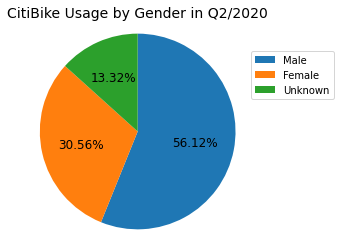

In [53]:
# Plot user gender in 2020 using pie chart.
pie_chart(df_f2020['gender'],'CitiBike Usage by Gender in Q2/2020','center')
plt.legend(bbox_to_anchor=(1.00,0.891), loc="upper left");

In the second quarter of 2020, 56% of CitiBike users were male. And 30% of its users were female.

- What's the most used bike in 2021?

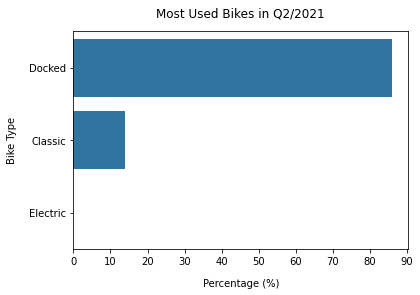

In [54]:
# Plot a bar chart having the percentages, instead of the actual count.

base_color=sb.color_palette()[0]

# Count the frequency of unique values in the `bike_type` column in 2021. 
type_counts = df_f2021['bike_type'].value_counts()

# Get the unique values of the `bike_type` column, in the decreasing order of the frequency.
type_order = type_counts.index 

# Compute the length of the longest bar in terms of the proportion
max_prop = type_counts[0] / df_f2021.shape[0]

# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
#   between 0 and max_prop, with a step size 10%
tick_props = np.arange(0, max_prop+0.1, 0.1)

# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
tick_names = ['{:0.0f}'.format(v*100) for v in tick_props]

#Plot the bar chart
sb.countplot(data=df_f2021, y='bike_type', color=base_color, order=type_order);

# Set xticks, labels and title of the chart
plt.xticks(tick_props * df_f2021.shape[0], tick_names)
plt.xlabel('Percentage (%)',labelpad=12);
plt.ylabel('Bike Type',labelpad=12);
plt.title('Most Used Bikes in Q2/2021',pad=15);

get the frequency of each unique value.

In [55]:
df_f2021['bike_type'].value_counts()

Docked      6834213
Classic     1115844
Electric          6
Name: bike_type, dtype: int64

Docked bike is the preferred bike for CitiBike users in the second quarter of 2021. Around 86% CitiBike users prefer Docked bike than other types. Electric Bike has 0% that means had been used few times over 3 months, maybe because of its price per minute compared to others.

#### Comparison Questions

- How many trips made in the system?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font size="2">compare number of trips made in Citibike during the second quarter of years (Apr-Jun) 2020 and 2021.</font>

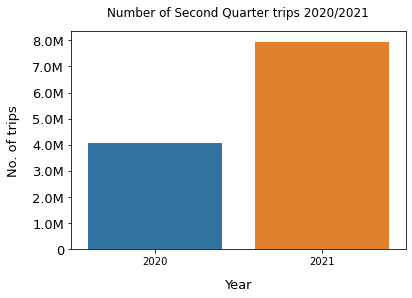

In [64]:
# Return the Series having count of trips from years dataframes.
yrs_trip_count = pd.Series([df_f2020.shape[0],df_f2021.shape[0]]);
yaxis_range, yaxis_labels = num_col_ticks(max(yrs_trip_count),1000000,500000);

# Plot counts using bar chart
sb.barplot(data = yrs_trip_count, x = ['2020','2021'], y = yrs_trip_count);

# Set yticks range and labels
plt.yticks(yaxis_range,yaxis_labels, fontsize=13);
# Set chart title and x,y labels
plt.title('Number of Second Quarter trips 2020/2021',pad = 15);
plt.xlabel('Year',labelpad = 12,size= 13);
plt.ylabel('No. of trips',labelpad = 12,size= 13);

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <font size="2"> calculate number of new stations used in 2021.</font>

In [48]:
# Get the new stations added in 2021 which not exist in 2020
main_list = list(set(df_f2021.start_station_name.unique()) - set(df_f2020.start_station_name.unique()))
print("Number of new stations in 2021: ",len(main_list))

Number of new stations in 2021:  563


There are 563 new stations used in 2021 that means convering more areas of New York City.<br>
The number of trips in 2021 has almost doubled as shown in the previous chart.

- Which user made the most trips?

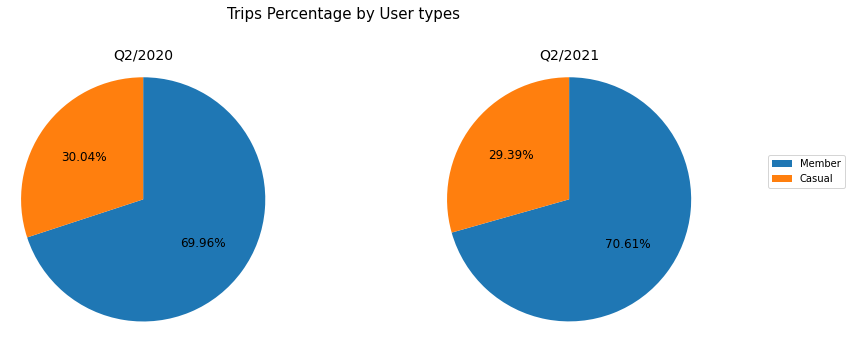

In [49]:
# Plot two pie charts side-by-side for years 2020 and 2021.
# Set a larger figure size for subplots
fig = plt.figure(figsize = [14, 5]) 

# pie chart on left for year 2020.
plt.subplot(1, 2, 1)
pie_chart(df_f2020['member_casual'],'Q2/2020','center')

# pie chart on right for year 2021.
plt.subplot(1, 2, 2)
pie_chart(df_f2021['member_casual'],'Q2/2021','center')

# Set Main tile, legend and x,y labels of figure
leg_lines,leg_labels = plt.gca().get_legend_handles_labels()
fig.legend(leg_lines, leg_labels, loc='center right')
fig.suptitle('Trips Percentage by User types',size= 15,y=1.04);

According to the above two charts, around 70% of the total trips were made by Members in 2020 and 2021.
There is a tiny difference between percentages of 2021 and 2020.

- What times of the days does the system get the most usage?

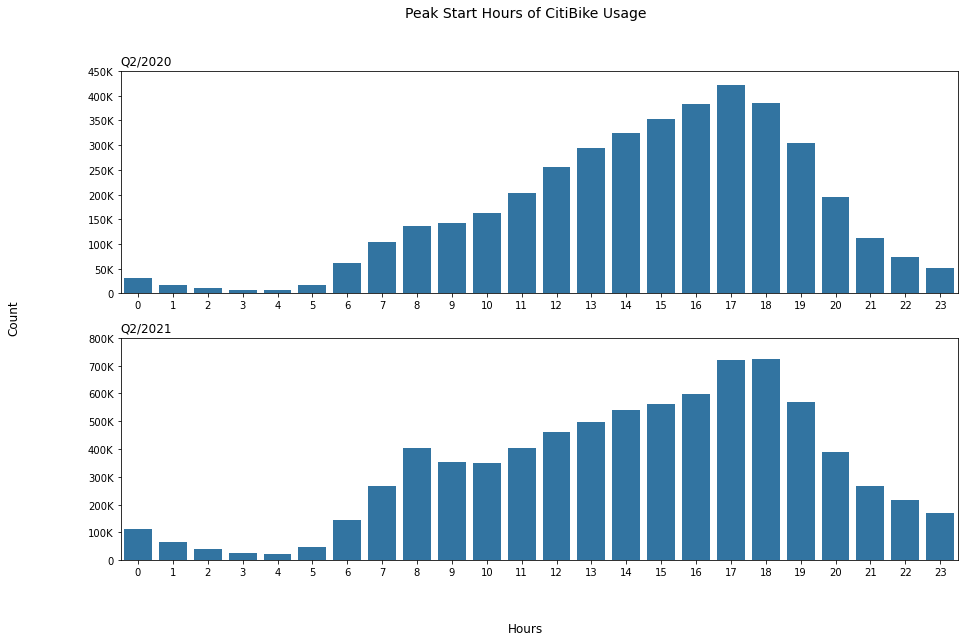

In [50]:
# Plot two bar charts for 2020 and 2021.
#  set a larger figure size for subplots
fig, ax = plt.subplots(nrows=2, figsize = [15,9])
#  set 'blue' as default color.
default_color = sb.color_palette()[0]

# year 2020
count_plot(0,df_f2020,'start_hour','Q2/2020','left',default_color,50000,50000)

# year 2021
count_plot(1,df_f2021,'start_hour','Q2/2021','left',default_color,100000,100000)

# Set Main tile and x,y labels of figure
fig.supylabel('Count')
fig.supxlabel('Hours')
fig.suptitle('Peak Start Hours of CitiBike Usage',size= 14);

According to the above two charts, CitiBike usage gradually increases from 8 AM to 6 PM.
That's aligned with normal working hours in New York City.


- How long does the average trip take?

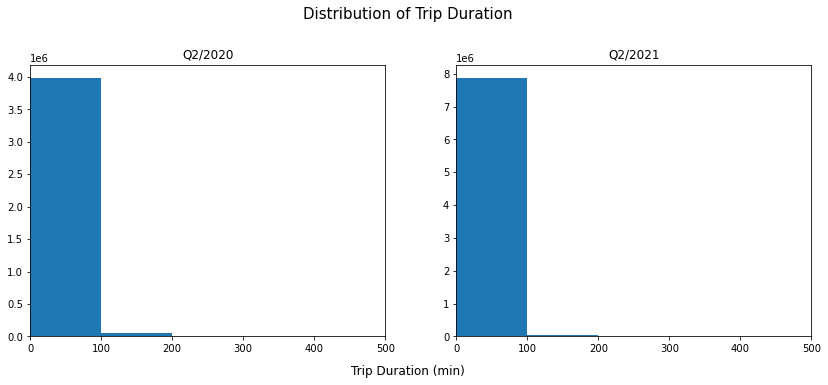

In [51]:
# Histogram of trip duration distribution in 2020 and 2021.
#  set bins
binsize = 100

# Set a larger figure size for subplots
fig=plt.figure(figsize = [14, 5]) 

# year 2020
#   left hist
plt.subplot(1, 2, 1)
bins = np.arange(0, df_f2020['duration_min'].max()+binsize, binsize);
hist(df_f2020,'duration_min','Q2/2020',bins,xscale='',xlim=500)

# year 2021
#  right hist
plt.subplot(1, 2, 2)
bins = np.arange(0, df_f2021['duration_min'].max()+binsize, binsize);
hist(df_f2021,'duration_min','Q2/2021',bins,xscale='',xlim=500)

# Set Main tile and x labels of figure
fig.supxlabel('Trip Duration (min)')
fig.suptitle('Distribution of Trip Duration',size= 15,y=1.04);

The above two histograms follows a highly skewed distribution. It's difficult to interpret x-axis ticks.
It's solved by applying a logarithmic transformation to x-axis .

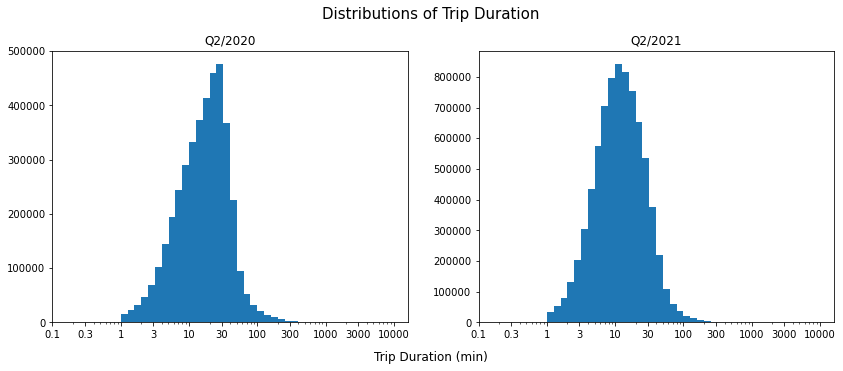

In [52]:
# A a logarithmic transformation to 'Trip Duration' histograms

#  set xticks labels
ticks = [0.1,0.3,1,3,10,30,100,300,1000,3000,10000]
labels = ['{}'.format(val) for val in ticks]
bins_edges = 10**np.arange(0,4.0+0.1,0.1)

# Set a larger figure size for subplots
fig=plt.figure(figsize = [14, 5]) 


# year 2020

#  left hist
plt.subplot(1, 2, 1)
hist(df_f2020,'duration_min','Q2/2020',bins_edges,xscale='log',xticks=ticks,xlabels=labels)

# year 2021
#  right hist
plt.subplot(1, 2, 2)
hist(df_f2021,'duration_min','Q2/2021',bins_edges,xscale='log',xticks=ticks,xlabels=labels)

# Set Main tile and x labels of figure
fig.supxlabel('Trip Duration (min)')
fig.suptitle('Distributions of Trip Duration',size= 15,y=1.001);

When plotted on a log-scale, the trip duration distribution looks roughly unimodal.<br> 
In 2020, distribution with one peak around 10 minutes in 2021 and a second large peak around 20 minutes. In 2020, with one peak around 30 minutes in 2021 and a second large peak around 20 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


>The initial distribution of trip duration varaible was based on its natural units. That distribution followed a highly skewed distribution. Under the log transformation, the data looked unimodal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 1. The trip duration was calculated in minutes. because it is difficult to find trip that didn't exceed 1 min.
> 2. New variables created: 'hour','month' and 'day of the week' from existing variabe 'Start Date and Time'.

<a id='bi'></a>
## Bivariate Exploration

- When are most trips taken in terms month?

In [56]:
# Get trips per month from 2020 and 2021 dataframes.
#  dataframe of counts per month for years.
df_yrs_month = pd.DataFrame(columns=['year','month_count','start_month']);
#     generate 
for yr_dt in [['2020',df_f2020],['2021',df_f2021]]:
    df_yr = pd.DataFrame()
    df_yr['month_count'] =  yr_dt[1]['start_month'].value_counts().sort_values().to_list()
    df_yr['start_month'] =  yr_dt[1]['start_month'].value_counts().sort_values().index
    df_yr['year'] = yr_dt[0]
    df_yrs_month = df_yrs_month.append(df_yr, ignore_index = True)

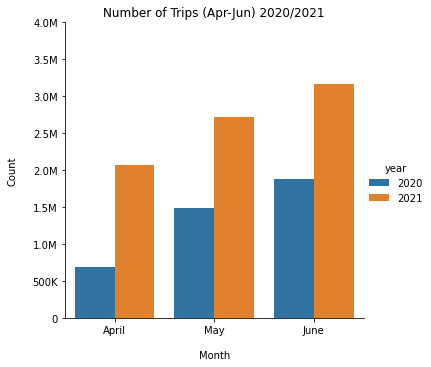

In [65]:
# Plot dataframe of counts per month in one chart.
g = sb.catplot(x='start_month',y='month_count', hue='year', kind='bar', data=df_yrs_month);
#   set yticks range and labels
ytick_rng_21, ytick_lbls_21 = num_col_ticks(df_yrs_month['month_count'].max(),500000,1000000);
g.set(yticks=ytick_rng_21,yticklabels=ytick_lbls_21);
#   set chart title
g.ax.set_title("Number of Trips (Apr-Jun) 2020/2021");
#   set axes labels
g.ax.set_xlabel("Month",labelpad=15);
g.ax.set_ylabel("Count",labelpad=15);

According to the above chart, there is a significant increase in the number of trips in the second quarter of 2021 compared to 2020. The increase has doubled as in April. Most of the trips were made in June (Spring/Summer Season) according to NYC weather.

- What's the average of trip duration taken by users?

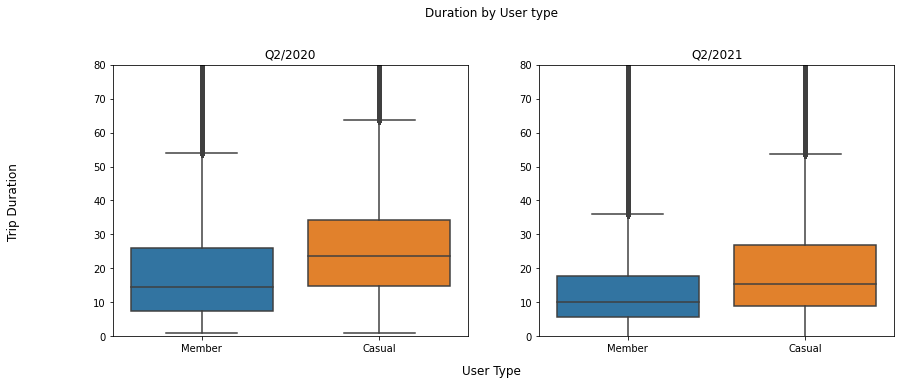

In [66]:
# Plot two box plots for years 2020 and 2021.
# Set a larger figure size for subplots
fig=plt.figure(figsize = [14, 5]) 

# left plot for year 2020.
plt.subplot(1, 2, 1)
box_plot(df_f2020,'member_casual','duration_min','Q2/2020',ylim=80)

# right plot for year 2021.
plt.subplot(1, 2, 2)
box_plot(df_f2021,'member_casual','duration_min','Q2/2021',ylim=80)


# Set Main tile and x,y labels of figure
fig.supylabel('Trip Duration')
fig.supxlabel('User Type')
fig.suptitle('Duration by User type',y=1.04);

According to the above two charts, the avg. of trip duration for Casual users is higher than Member users.
Maybe it is due to mostly the user who has a membership is a NYC local. But casual user represents visitors or tourists to NYC 
meaning longer distances to discover NYC.

-  Is there a relation between trip duration and day of the week? 

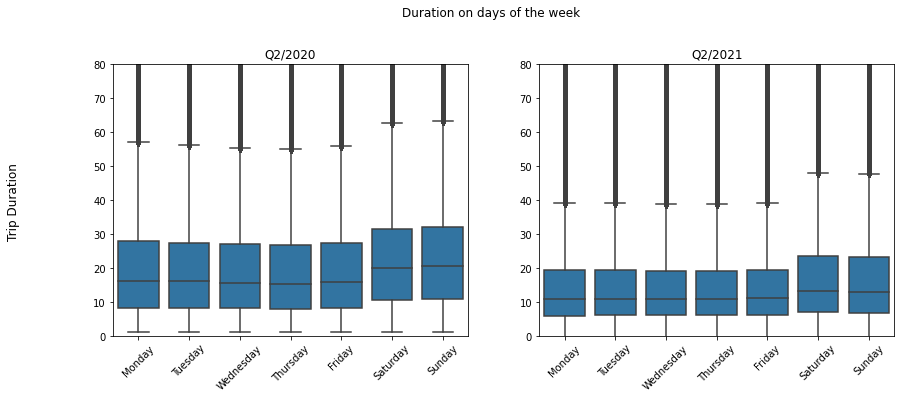

In [59]:
# Plot two box plots for years 2020 and 2021.
# Set a larger figure size for subplots
fig=plt.figure(figsize = [14, 5]) 
base_color=sb.color_palette()[0]


days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# left chart for year 2020.
plt.subplot(1, 2, 1)
box_plot(df_f2020,'start_day','duration_min','Q2/2020',bs_color=base_color,ylim=80,x_rot_deg=45,x_order=days_order)


# right chart for year 2021.
plt.subplot(1, 2, 2)
box_plot(df_f2021,'start_day','duration_min','Q2/2021',bs_color=base_color,ylim=80,x_rot_deg=45,x_order=days_order)


# Set Main tile and x,y labels of figure
fig.supylabel('Trip Duration')
fig.suptitle('Duration on days of the week',y=1.04);

In 2020 and 2021, Saturday and Sunday have the highest average trip duration compared to other days of week.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. Number of trips is affected by the seasons.
> 2. The avg. of trip duration for Casual users is higher than Member users.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is no significant relationships between other features.

<a id='multi'></a>
## Multivariate Exploration

#### Custom Questions

- How gender and user type affect the trip duration in 2020?

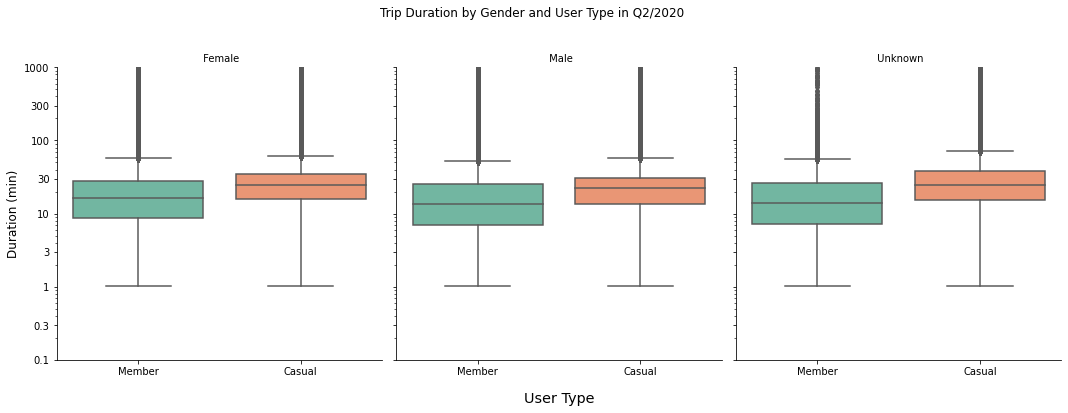

In [61]:
# Plot the relationship between gender, user type and trip duration using FacetGrid of boxplots.
g = sb.FacetGrid(data = df_f2020, col = 'gender', height = 5)
g.map(sb.boxplot, 'member_casual', 'duration_min', palette="Set2",order=df_f2020.member_casual.value_counts().index)

# Generate y_axis ticks and labels.
y_ticks = [0.1,0.3,1,3,10,30,100,300,1000]
y_labels = ['{}'.format(val) for val in y_ticks]


# Remove '=' from box_plot title. Since title of boxplot in facetgrid includes '=', ex."gender = female".
for ax in g.axes.flat:
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],fontsize='medium')


# apply logarithmic transformation to 'Trip Duration' to make chart interpretable
plt.yscale('log')

# Set limit to y_axis
plt.ylim(0.1,1000)

#  set y_axis title, ticks and labels.
plt.yticks(y_ticks, y_labels);
g.set_axis_labels(x_var="", y_var="Duration (min)",fontsize='large');

# Set x_axis label
g.axes[0,1].set_xlabel('User Type',labelpad=15,fontsize='x-large');

# Set Chart Title
plt.suptitle("Trip Duration by Gender and User Type in Q2/2020", y=1.10);

According to the above three charts, the average of trip duration for member females is higher than the average of trip duration for other members (male and unknown). The trip duration average of casual users is approximately equal for all genders.

- Is the trip duration affected by the types of user and bikes in 2021?

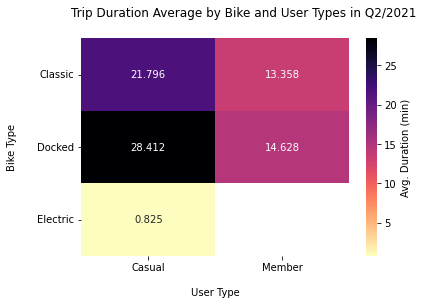

In [62]:
# Plot the relationship between bike type, user type and trip duration using heatmap.

#  first, group trips by user type and bike type then get average of trip duration of these trips.
cat_means = df_f2021.groupby(['member_casual', 'bike_type']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'Avg. Duration (min)')

#  use pivot_table function to spread the data from long form to tidy form to generate heatmap.
cat_means = cat_means.pivot(index = 'bike_type', columns = 'member_casual',values = 'Avg. Duration (min)')

#  generate the heatmap
sb.heatmap(cat_means, annot = True, fmt = '.3f',cbar_kws = {'label' : 'Avg. Duration (min)'}, cmap = 'magma_r');

# Set x,y axes labels.
plt.yticks(rotation=0)
plt.ylabel('Bike Type',labelpad=20);
plt.xlabel('User Type',labelpad=15);
plt.suptitle("Trip Duration Average by Bike and User Types in Q2/2021", y=0.99);

From the heat map, the avg. of trip duration is longer when using Docked bike than using Classic bike for Casual and Member users. As we concluded before the avg. of trip duration for Casual users is higher than Member users.

#### Comparison Questions

- Which times of the day users take more time in their trips?

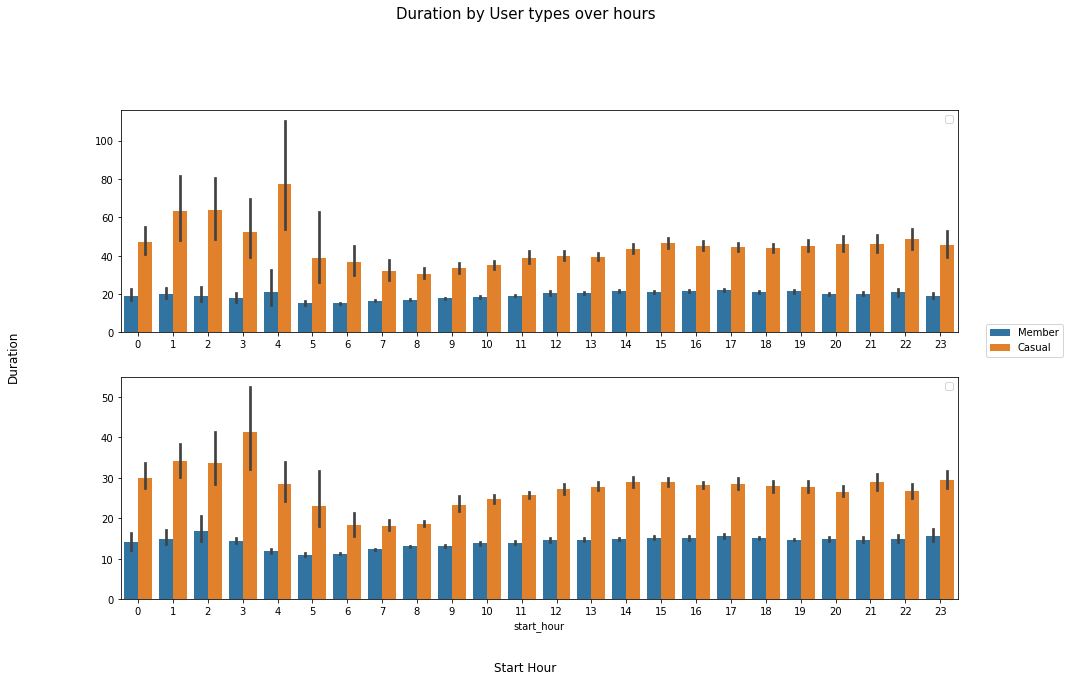

In [60]:
# Set a larger figure size for subplots
fig, ax = plt.subplots(nrows=2, figsize = [15,9])

# year 2020
#   first chart
g= sb.barplot(data = df_f2020, x = 'start_hour', y = 'duration_min', hue = 'member_casual', ax = ax[0])
ax[0].set_ylabel('');
ax[0].set_xlabel('');
ax[0].legend('');

# year 2021
#   second chart
g= sb.barplot(data = df_f2021, x = 'start_hour', y = 'duration_min', hue = 'member_casual', ax = ax[1])
ax[1].set_ylabel('');
ax[1].legend('');

# Set Main tile, legend and x,y labels of figure

leg_lines,leg_labels = ax[0].get_legend_handles_labels()
fig.legend(leg_lines, leg_labels, loc='center right');
fig.suptitle('Duration by User types over hours',size= 15,y=1.04);
fig.supylabel('Duration');
fig.supxlabel('Start Hour');

At 4 AM, casual user took longer trips than any hour in 2020. And in 2021, casual user took longer trips at 3 AM than any hour.
Regarding the other user, there is no significant difference between hours.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relations between trip duration, gender, bike type and user type.

### Were there any interesting or surprising interactions between features?

> The interaction between day of the week and trip duration. Weekends have the highest average trip duration compared to other days of week.

<a id='conclusions'></a>
## Conclusions

- In the second quarter of 2020, 56% of CitiBike users were male. And 30% of its users were female.
- Docked bike is the preferred bike for CitiBike users in the second quarter of 2021. Electric bike only had been used 6 times over 3 months, maybe because of its price per minute compared to others.
- The number of trips in the second quarter of the year 2021 has almost doubled.
- Around 70% of the total trips were made by Members in 2021.
- CitiBike usage gradually increases during normal working hours in New York City.
- Most of the trips were made in June (Spring/Summer Season) according to NYC weather.
- The average of trip duration for Casual users is higher than Member users.
- In 2020 and 2021, Saturday and Sunday have the highest average trip duration compared to other days of week.
- The average of trip duration for member females is higher than the average of trip duration for other members (male and unknown).
- The average of trip duration is longer when using Docked bike than using Classic bike for Casual and Member users.